In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

states_merged = pd.read_csv('states_merged.csv')

In [2]:
states_merged

,State,County,Population,Ratio,Household,Interaction,Death_rt_2020,Death_rt_2021
0,California,Alameda,1661584,0.33,585632,0.126225,39.540583,92.923379
1,California,Butte,223344,0.18,77651,0.009129,42.983022,152.679275
2,California,Contra Costa,1147788,0.29,399792,0.075725,29.186575,93.484163
3,California,El Dorado,190345,0.24,74216,0.011634,11.557961,90.362237
4,California,Fresno,990204,0.13,315974,0.026829,65.239082,240.253524
...,...,...,...,...,...,...,...,...
111,New York,Tompkins,102237,0.31,40322,0.073566,13.693673,69.446482
112,New York,Ulster,178371,0.24,69376,0.097993,79.048724,174.916326
113,New York,Warren,64187,0.23,29593,0.040058,49.854332,163.584526
114,New York,Wayne,90103,0.16,36634,0.034497,39.954275,138.730120


In [3]:
pctg = 0.4
ratios = states_merged['Ratio']
houdeholds = states_merged['Household']
qrts = np.quantile(ratios, [1 - pctg])[0]
qhhs = np.quantile(houdeholds, [1 - pctg])[0]

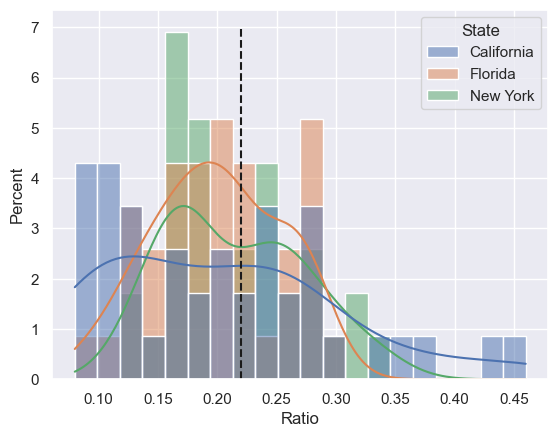

In [4]:
sns.histplot(data=states_merged, x="Ratio", kde=True, bins=20, hue="State", stat="percent")
plt.plot([qrts, qrts], [0.0, 7], 'k--');

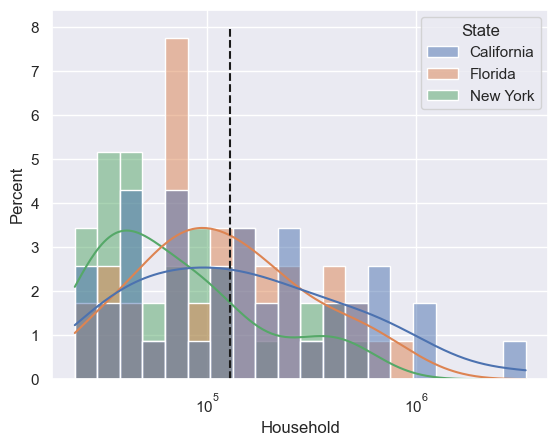

In [5]:
sns.histplot(data=states_merged, x="Household", kde=True, bins=20,
             hue="State", stat="percent",log_scale=True)
plt.plot([qhhs, qhhs], [0.0, 8], 'k--');

<AxesSubplot:xlabel='Household', ylabel='Percent'>

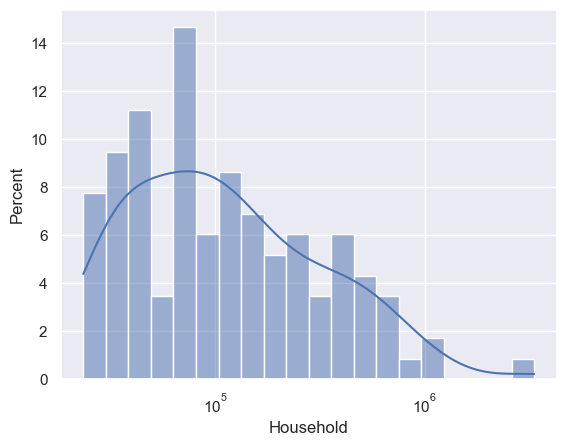

In [6]:
sns.histplot(data=states_merged, x="Household", kde=True, bins=20, log_scale=True, stat="percent")

<AxesSubplot:xlabel='Death_rt_2021', ylabel='Density'>

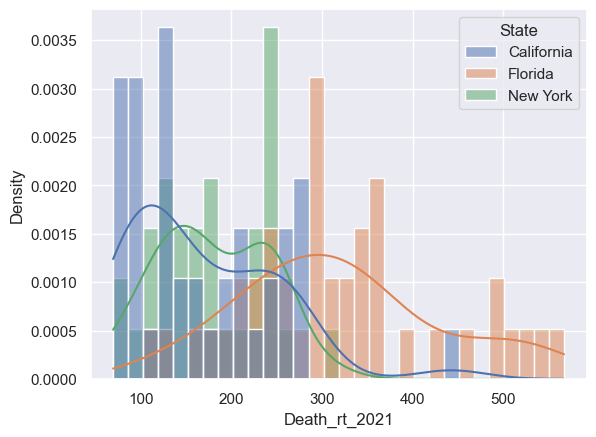

In [7]:
sns.histplot(data=states_merged, x="Death_rt_2021", kde=True, bins=30,
             hue="State", log_scale=False, stat="density")

In [14]:
grouped_df = pd.DataFrame() #.copy(states_merged)
grouped_df['State'] = states_merged["State"]
grouped_df['Death_rate'] = states_merged["Death_rt_2021"]
grouped_df['Ratio'] = pd.to_numeric(states_merged.Ratio >= qrts).astype('Float64')
grouped_df['Household'] = pd.to_numeric(states_merged.Household >= qhhs).astype('Float64')
grouped_df['Interaction'] = grouped_df['Ratio']*grouped_df['Household']
grouped_df.to_csv('grouped_df.csv', index=False)
grouped_df

,State,Death_rate,Ratio,Household,Interaction
0,California,92.923379,1.0,1.0,1.0
1,California,152.679275,0.0,0.0,0.0
2,California,93.484163,1.0,1.0,1.0
3,California,90.362237,1.0,0.0,0.0
4,California,240.253524,0.0,1.0,0.0
...,...,...,...,...,...
111,New York,69.446482,1.0,0.0,0.0
112,New York,174.916326,1.0,0.0,0.0
113,New York,163.584526,1.0,0.0,0.0
114,New York,138.730120,0.0,0.0,0.0
